# FRONTERA EFICIENTE

## Autor: Lucía Saiz Lapique

__Práctica 2__

__Gestión de Activos y Carteras__

__CUNEF__

Con el estudio a continuación, el objetivo es, con los datos proporcionados, calcular la frontera eficiente,e s decir, el conjunto de las carteras más eficientes del mercado, teniendo en cuenta el mayor rendimiento posible con la menor cantidad de riesgo quue supongan.

Se ha decidido llevar a cabo este estudio con esta herramienta (Python), pues debido al resto de trabajos ejecutados en el curso, tenemos más soltura con este lenguaje que con Excel. 

En primer lugar, cargamos las librerias necesarias y los datos proporcionados para el estudio en cuestión.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
datos = pd.read_csv('datos.csv')

In [4]:
datos.head()

,Unnamed: 0,Date,Renta Fija Global,High Yiled,Renta Fija EM,S&P 500,Eurostoxx 500,MSCI EM,Materias Primas
0,1,2005-03-18,301.2433,496.8759,145.9396,1189.65,3053.54,564.03,286.605
1,2,2005-03-21,300.9975,494.3484,144.6459,1183.79,3038.14,559.81,283.784
2,3,2005-03-22,300.7714,492.1392,145.2945,1171.71,3050.44,557.28,282.463
3,4,2005-03-23,300.4403,488.7936,142.7985,1172.53,3036.85,547.41,276.941
4,5,2005-03-24,300.7798,488.4738,142.6710,1171.42,3060.67,546.14,277.817


Editamos la base de datos insertada para convertir los datos de la fecha en formato de fecha y eliminar la columna de indice que se incluyó al importar la base de datos.

In [5]:
datos.pop('Unnamed: 0')
datos['Date'] = pd.to_datetime(datos['Date'], format="%Y-%m-%d")
datos = datos.set_index('Date')

In [6]:
datos

,Renta Fija Global,High Yiled,Renta Fija EM,S&P 500,Eurostoxx 500,MSCI EM,Materias Primas
Date,,,,,,,
2005-03-18,301.2433,496.8759,145.9396,1189.65,3053.54,564.03,286.6050
2005-03-21,300.9975,494.3484,144.6459,1183.79,3038.14,559.81,283.7840
2005-03-22,300.7714,492.1392,145.2945,1171.71,3050.44,557.28,282.4630
2005-03-23,300.4403,488.7936,142.7985,1172.53,3036.85,547.41,276.9410
2005-03-24,300.7798,488.4738,142.6710,1171.42,3060.67,546.14,277.8170
...,...,...,...,...,...,...,...
2020-03-19,561.9609,1134.7110,255.1036,2409.39,2454.08,766.41,131.0129
2020-03-20,565.9576,1135.1790,258.9450,2304.92,2548.50,803.23,130.3159
2020-03-23,568.7989,1115.0340,252.9646,2237.40,2485.54,758.20,132.2568


A continuación, generamos una nueva base de datos que mantenga la fecha como índice y que calcule el rendimiento diario en comparación con el día anterior para cada variable. 

In [7]:
df = datos.pct_change().dropna()

In [8]:
df.tail()

,Renta Fija Global,High Yiled,Renta Fija EM,S&P 500,Eurostoxx 500,MSCI EM,Materias Primas
Date,,,,,,,
2020-03-19,-0.001285,-0.026207,-0.018657,0.004708,0.028611,-0.027164,0.032752
2020-03-20,0.007112,0.000412,0.015058,-0.043360,0.038475,0.048042,-0.005320
2020-03-23,0.005020,-0.017746,-0.023095,-0.029294,-0.024705,-0.056061,0.014894
2020-03-24,-0.000012,0.007747,0.014032,0.093828,0.092362,0.057320,0.028352
2020-03-25,0.000807,0.022520,0.018958,0.011535,0.031317,0.043510,0.003423


Como primer parámetro que debemos introducir, consideramos que la mejor manera de elegir los pesos es asignandole a cada acción un peso proporcional al precio que tiene cada una de ellas. Por tanto, calculamos el valor mas reciente del precio total invertido por todas las acciones y los pesos adjudicados a cada uno seria el porcentaje resultando del precio de cada accion entre el precio total de la cartera. 

In [9]:
total = datos['Renta Fija Global'][-1] + datos['High Yiled'][-1] + datos['Renta Fija EM'][-1] + datos['S&P 500'][-1] + datos['Eurostoxx 500'][-1] + datos['MSCI EM'][-1] +  datos['Materias Primas'][-1]

In [10]:
#Creamos matriz de pesos para cada activo ("Equally weighted")
weights = [datos['Renta Fija Global'][-1]/total, datos['High Yiled'][-1]/total,  datos['Renta Fija EM'][-1]/total,
           datos['S&P 500'][-1]/total, datos['Eurostoxx 500'][-1]/total, datos['MSCI EM'][-1]/total, datos['Materias Primas'][-1]/total]

A continuación generamos una cartera de base con los pesos seleccionados, donde podemos ver su rendimiento esperado según esos pesos, los pesos activos seleccionados y la matriz de varianzas y covarianzas. 

In [11]:
n_assets = len(df.columns)
w = np.array(weights)
r = np.array(np.mean(df))
C = np.cov(df.transpose())

#Validamos
print("Rendimiento esperado:", r)
print("Pesos activos:", w)
print("Matriz VarCov:", C)

Rendimiento esperado: [ 1.63652623e-04  2.19374118e-04  1.68826619e-04  2.61000180e-04
  7.15685573e-05  1.76984122e-04 -1.36047492e-04]
Pesos activos: [0.06918195 0.13963694 0.03176556 0.3008586  0.34030531 0.10166599
 0.01658565]
Matriz VarCov: [[ 2.41730034e-06  2.59251684e-07 -6.10129098e-08 -5.07930760e-06
  -5.71829230e-06 -3.12897042e-06 -2.30468160e-06]
 [ 2.59251684e-07  1.07284627e-05  1.34187561e-05  1.44386087e-05
   2.27384078e-05  2.57014714e-05  1.23112668e-05]
 [-6.10129098e-08  1.34187561e-05  4.00824911e-05  2.86777353e-05
   4.80544606e-05  5.64740027e-05  2.99772902e-05]
 [-5.07930760e-06  1.44386087e-05  2.86777353e-05  1.47397650e-04
   1.01529916e-04  7.26532499e-05  4.26607766e-05]
 [-5.71829230e-06  2.27384078e-05  4.80544606e-05  1.01529916e-04
   1.87004114e-04  1.08497147e-04  5.45060441e-05]
 [-3.12897042e-06  2.57014714e-05  5.64740027e-05  7.26532499e-05
   1.08497147e-04  1.52217356e-04  5.61383119e-05]
 [-2.30468160e-06  1.23112668e-05  2.99772902e-05  

A continuación, se incluyen una serie de funciones para calcular el rendimiento anualizado del portfolio, la desviación estandar anualizada del portfolio (el riesgo), el ratio de Sharp, donde podemos alterad el rendimiento deseado (en este caso se ha seleccionado 0.04 porque era el valor máximo de rendimiento con el cual se mantenía positivo el ratio de Sharpe), los portfolios aleatorios para graficar y la tangente con la frontera eficiente.

In [12]:
def mu(w,r):
    '''Rendimiento portafolio anualizado'''
    return sum(w * r * 252) 


def sigma(w, C):
    '''Desv STD portadolio anualizada'''
    return np.dot(w,np.dot(C,w.T)) ** (1/2) * 252 ** (1/2)


def sharpe(w):
    '''Sharpe ratio con rf de 4%'''
    '''CAMBIAR RENDIMIENTO AQUI'''
    rf = .04
    return (mu(w,r) - rf) / sigma(w,C)


def neg_sharpe(w):
    '''Sharpe ratio negativo'''
    return -sharpe(w)


def random_ports(n):
    '''Portfolios aleatorios'''
    means, stds = [],[]
    for i in range(n):
        rand_w = np.random.rand(len(df.columns))
        rand_w = rand_w / sum(rand_w)
        means.append(mu(rand_w, r))
        stds.append(sigma(rand_w,C))
    
    return means, stds

def linea(x):
    '''CAMBIAR RENDIMIENTO AQUI'''
    n = 0.04
    m = (best_mu - n)/best_sigma
    y = m*x + n
    return y

In [13]:
np.random.rand(len(df.columns))

array([0.96556366, 0.08389254, 0.82815617, 0.57006801, 0.96851543,
       0.69814726, 0.13011386])

### Un portafolio "Equally weighted" tendría un Sharpe Ratio de:

In [14]:
print("Sharpe port equal w:", round(sharpe(w),2))

Sharpe port equal w: 0.01


Con el código a continuación, generamos los pesos óptimos de nuestra cartera, donde podemos indicar si solicitaoms pesos mínimos o máximos para cualquiera de las acciones incluidas en nuestra cartera. En este caso, se selecciona que haya al menos un 5% de representación de cada acción en la cartera total, pues si no se selecciona un mínimo, la función elige invertir unicamente en dos de ellas. Además, incluimos también un máximo, para que no haya tanto desbalanceo, pero de todas formas hay tres acciones principales con mayor peso (las que tienen menos riesgo).

En el resumen a continuación, al final del todo, nombrados con una x, vemos la selección de pesos óptimos que ha realizado la función con los parámetros introducidos: [0.05, 0.5 , 0.05, 0.25, 0.05, 0.05, 0.05]

In [15]:
import scipy.optimize as optimize

def apply_sum_constraint(inputs):
    total = 1 - np.sum(inputs)
    return total

my_constraints = ({'type': 'eq', "fun": apply_sum_constraint })


result = optimize.minimize(neg_sharpe, 
                      w,
                      method='SLSQP', 
                      bounds=((0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5)),
                      options={'disp': True},
                      constraints=my_constraints)
print(result)
optimal_w = result["x"]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.11502136190960882
            Iterations: 6
            Function evaluations: 54
            Gradient evaluations: 6
     fun: -0.11502136190960882
     jac: array([-0.49593203, -0.6043042 , -0.41265394, -0.55161318,  0.01610692,
       -0.3271375 ,  0.52557169])
 message: 'Optimization terminated successfully.'
    nfev: 54
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.05, 0.5 , 0.05, 0.25, 0.05, 0.05, 0.05])


In [26]:
cartera = datos*optimal_w
cartera['Suma'] = cartera.sum(axis = 1)
cartera

,Renta Fija Global,High Yiled,Renta Fija EM,S&P 500,Eurostoxx 500,MSCI EM,Materias Primas,Suma
Date,,,,,,,,
2005-03-18,15.062165,248.43795,7.296980,297.4125,152.6770,28.2015,14.330250,763.418345
2005-03-21,15.049875,247.17420,7.232295,295.9475,151.9070,27.9905,14.189200,759.490570
2005-03-22,15.038570,246.06960,7.264725,292.9275,152.5220,27.8640,14.123150,755.809545
2005-03-23,15.022015,244.39680,7.139925,293.1325,151.8425,27.3705,13.847050,752.751290
2005-03-24,15.038990,244.23690,7.133550,292.8550,153.0335,27.3070,13.890850,753.495790
...,...,...,...,...,...,...,...,...
2020-03-19,28.098045,567.35550,12.755180,602.3475,122.7040,38.3205,6.550645,1378.131370
2020-03-20,28.297880,567.58950,12.947250,576.2300,127.4250,40.1615,6.515795,1359.166925
2020-03-23,28.439945,557.51700,12.648230,559.3500,124.2770,37.9100,6.612840,1326.755015


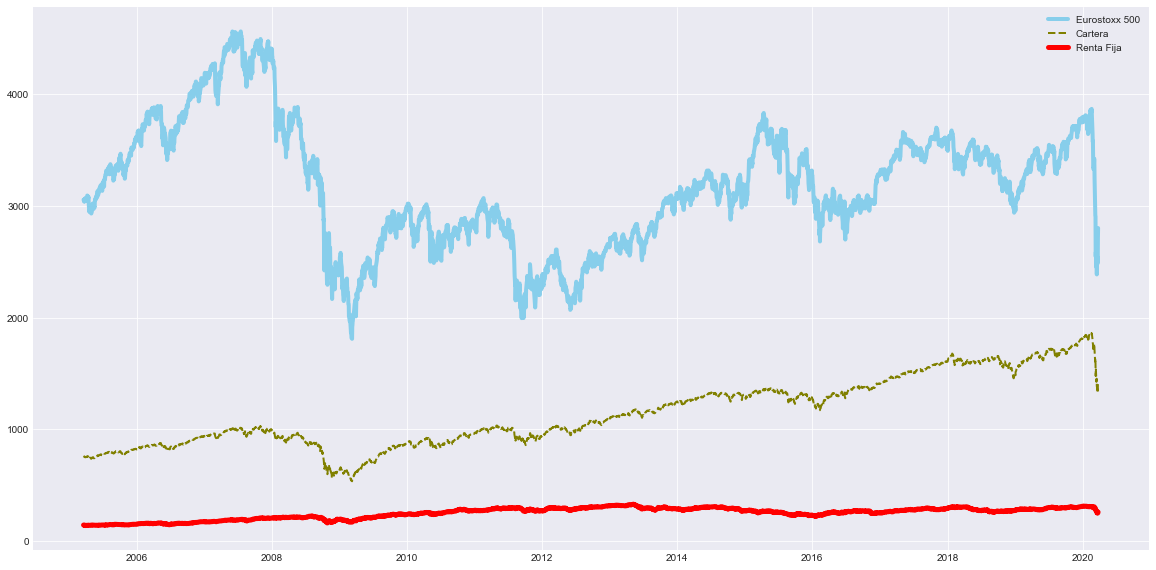

In [46]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Eurostoxx 500'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Eurostoxx 500')
plt.plot(cartera.index, cartera['Suma'], marker='', color='olive', linewidth=2, linestyle='dashed', label="Cartera")
plt.plot(datos.index, datos['Renta Fija EM'], marker='', color='red', linewidth=5, label = 'Renta Fija')
plt.legend()

Por último, generamos un gráfico que muestre todas las carteraas aleatorias generadas, que seleccione la que considera la mejor y muestre la frontera eficiente, que vemos de forma más clara con la tangente.

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

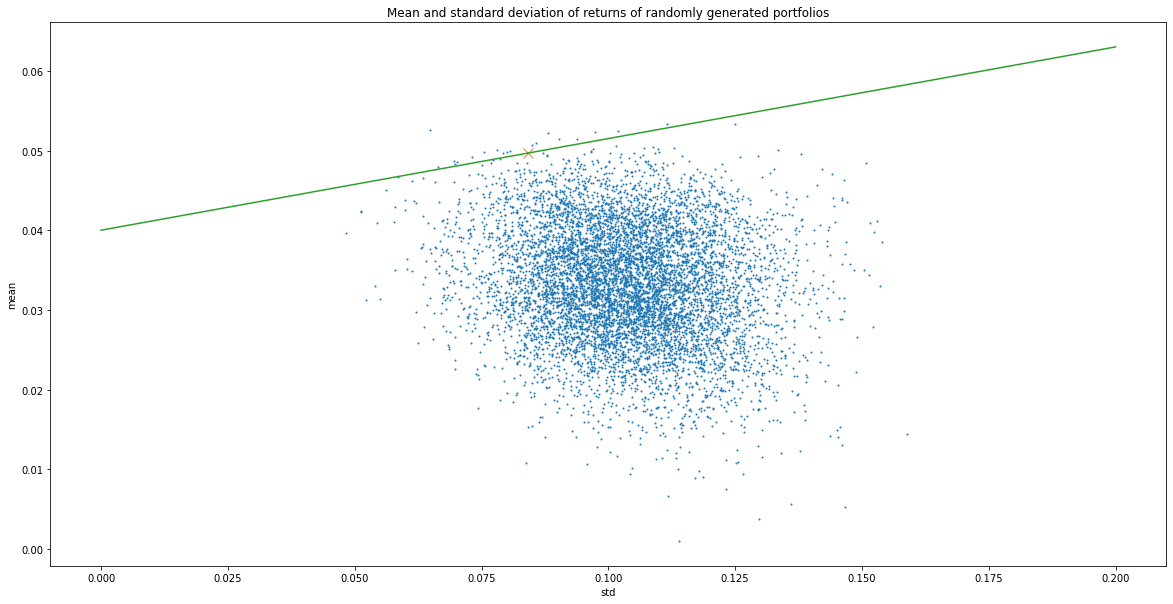

In [110]:
#Grafiquemos
n_portfolios = 8000   # generamos 8000 carteras aleatorias
means, stds = random_ports(n_portfolios) # generamos rendimientos y riesgos aleatorios

best_mu = mu(optimal_w, r) 
best_sigma = sigma(optimal_w, C)
best_sharpe = sharpe(optimal_w) ## la mejor cartera se seleccionara en base a los pesos óptimos, los renidmientos y el riesgo
# introducidos anteriormente
plt.figure(figsize=(20,10))
plt.plot(stds, means, 'o', markersize=1)
plt.plot(best_sigma, best_mu, 'x',  markersize=10)
plt.plot([0.00, 0.2], [0.04, linea(0.2)]) ## ajustar aqui el rendimiento
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

## Conclusiones:

* La cartera óptima tiene un rendimiento de aproximadamente 0.05 y un riesgo de 0.08 más o menos.
* Vemos que se generan ciertos errores en la selección de la mejor cartera, pues hay unas cuantas que superan la tangente y no deberían (todo lo que esté por encima de la tangente tiene mejor rendimiento, por lo tanto, es más eficiente, sobretodo si tienen el mismo o menos riesgo).
* Los pesos adjudicados al principio influyen en la selección de las mejores carteras, pero los elegidos fueron los que más sentido tenían.
* Poner un peso mínimo y máximo a la hora de seleccionar los pesos óptimos para cada cartera influye en las carteras seleccionadas, pues se iría casi todo el peso a las acciones más seguras (S&P 500 y Eurostoxx 500), y queríamos que la cartera tuviese participación de todas.
* Según el número de carteras aleatorias generadas, también cambia el resultado. 
* Del rendimiento y, por  consecuencia, el ratio de Sharpe influyen, ya que cuanto más alto es el ratio de Sharpe, más preciso es este estudio pero menor es el rendimiento. Como se mencionó previamente, se ha seleccionado el rendimiento más alto posible para mantener el ratio positivo (mediante prueba y error)

__Bibliografía:__

* https://www.linkedin.com/pulse/frontera-eficiente-en-python-oscar-rojas-cfa
* http://amarjen.github.io/dibujar-frontera-eficiente.html#.XqR0ImgzZPY